In [0]:
import os
os.chdir('/content/drive/My Drive/kaggle_study/dacon_star')

## 카메라

In [0]:
import pandas as pd
camera = pd.read_feather('data/camera.feather')

In [0]:
camera.head()

,Unnamed: 0,game_id,winner,time,player,species,event,event_contents
0,0,0.0,1.0,0,0.0,0.0,0.0,"at (145.25, 21.5078125)"
1,1,0.0,1.0,0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
2,4,0.0,1.0,0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)"
3,5,0.0,1.0,0,0.0,0.0,0.0,"at (142.5078125, 24.98828125)"
4,6,0.0,1.0,0,0.0,0.0,0.0,"at (139.6171875, 27.8828125)"


In [0]:
len(camera)

31629407

In [0]:
for i in range(5):
    globals()['game_cam{}'.format(i)]= camera[camera['game_id']==i]
    globals()['cam{}'.format(i)] = globals()['game_cam{}'.format(str(i))]['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])


In [0]:
import re
import time
t_start = time.time()
pat = re.compile('[^0-9.,]')
cam = game_cam['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])
# p1_xy = p1_cam['event_contents'].apply(lambda x: [float(i) for i in pat.sub('',x).split(',')])
time.time() -t_start

0.0048902034759521484

In [0]:


for i in range(5):
    x=[]
    y=[]
    for j,k in globals()['cam{}'.format(str(i))]:
        x.append(j)
        y.append(k)
    print(i)
    globals()['game_cam{}'.format(str(i))]['x'] = x
    globals()['game_cam{}'.format(str(i))]['y'] = y

[Text(0.5, 1.0, 'game_id 4, winner: [0.]')]

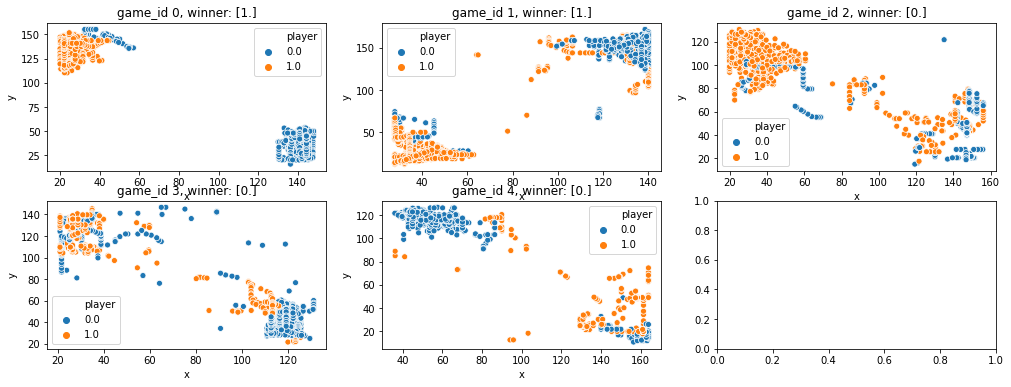

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows=2,ncols=3)
fig.set_size_inches(17,6)
sns.scatterplot(data = game_cam0,x= 'x',y='y',hue='player',ax=ax1)
sns.scatterplot(data = game_cam1,x= 'x',y='y',hue='player',ax=ax2)
sns.scatterplot(data = game_cam2,x= 'x',y='y',hue='player',ax=ax3)
sns.scatterplot(data = game_cam3,x= 'x',y='y',hue='player',ax=ax4)
sns.scatterplot(data = game_cam4,x= 'x',y='y',hue='player',ax=ax5)


ax1.set(title="game_id 0, winner: {}".format(game_cam0['winner'].unique()))
ax2.set(title="game_id 1, winner: {}".format(game_cam1['winner'].unique()))
ax3.set( title="game_id 2, winner: {}".format(game_cam2['winner'].unique()))
ax4.set( title="game_id 3, winner: {}".format(game_cam3['winner'].unique()))
ax5.set( title="game_id 4, winner: {}".format(game_cam4['winner'].unique()))

## starting point 찾기

In [0]:
print(camera.shape)
camera.head()

(31629407, 8)


,Unnamed: 0,game_id,winner,time,player,species,event,event_contents
0,0,0.0,1.0,0,0.0,0.0,0.0,"at (145.25, 21.5078125)"
1,1,0.0,1.0,0,1.0,0.0,0.0,"at (22.75, 147.0078125)"
2,4,0.0,1.0,0,0.0,0.0,0.0,"at (142.99609375, 24.50390625)"
3,5,0.0,1.0,0,0.0,0.0,0.0,"at (142.5078125, 24.98828125)"
4,6,0.0,1.0,0,0.0,0.0,0.0,"at (139.6171875, 27.8828125)"


In [0]:
import threading
import concurrent.futures
import time
t_start = time.time()

p0_st = []
p1_st = []
def starting_point(data,i):
    p0_stp= list(data.loc[(data['game_id']==i) & (data['player']==0),'event_contents'][:1])
    p1_stp =list( data.loc[(data['game_id']==i) & (data['player']==1),'event_contents'][:1])

    return p0_stp,p1_stp


with concurrent.futures.ThreadPoolExecutor() as executor:
    t= [executor.submit(starting_point,camera,i) for i in camera['game_id'].unique()]

for i in t:
    a,b = i.result()
    p0_st.append(a)
    p1_st.append(b)

time.time() - t_start

In [0]:
pat.sub('',p0_st[0][0]).split

'145.25,21.5078125'

In [0]:
# import numpy as 
pat.sub('',camera.loc[(camera['game_id']==0) & (camera['player']==1),'event_contents'][:1])

## starting point 별 종족 승률

In [0]:
- 스타팅 포인트 가져와서 소수점 이하 자르고 스타팅 포인트를 최대한 범주형으로 만들어보자